## BACKTESTING STRATEGIES

## 1. DCA simple (frecuencia semanal y mensual)

## Conclusiones

* No existe diferencia significativa en el retorno entre los días de la semana.
* Se obtiene un mayor retorno realizando compras mensuales, de aproximadamente 8 puntos porcentuales
* El mejor día del mes es el 24 para el período de 2021, para el histórico total es el día 15.

In [235]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
from datetime import datetime, date, timedelta
import math
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()
sns.set_theme()

In [236]:
# Lectura de datos
start = datetime(1900,1,1)
end = datetime.now()
data = pdr.get_data_yahoo('BTC-USD', start, end, interval='d')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-11-12,65460.816406,62333.914062,64863.980469,64155.941406,3.608489e+10,64155.941406
2021-11-13,64915.675781,63303.734375,64158.121094,64469.527344,3.047423e+10,64469.527344
2021-11-14,65495.179688,63647.808594,64455.371094,65466.839844,2.512209e+10,65466.839844


In [237]:
# Crear variables y subset para análisis
df = data[['Adj Close']]['2017':'2021'].copy()
df = df.rename(columns={'Adj Close': 'btc_price'})
df['btc_return'] = df['btc_price'].pct_change()
df['day'] = df.index.day
df['weekday'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,btc_price,btc_return,day,weekday,month,year
Date,,,,,,
2017-01-01,998.325012,NaN,1,6,1,2017
2017-01-02,1021.750000,0.023464,2,0,1,2017
2017-01-03,1043.839966,0.021620,3,1,1,2017
2017-01-04,1154.729980,0.106233,4,2,1,2017
2017-01-05,1013.380005,-0.122410,5,3,1,2017


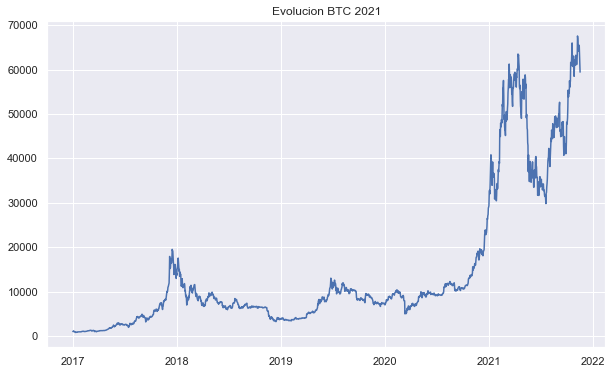

In [238]:
# Evolución BTC
plt.figure(figsize=(10,6))
plt.plot(df.index, df['btc_price'])
plt.title('Evolucion BTC 2021')
plt.grid(True)

## Weekly frequency

In [239]:
usdt = 50
initial_usdt = []
final_usdt = []
usdt_return = []
plt.figure(figsize=(10,6))


for i in range(7):
    df_sem = df[df['weekday']==i]
    df_sem['btc_return'] = df_sem['btc_price'].pct_change()
    df_sem['usdt_invested'] = usdt
    df_sem['btc_amount'] = df_sem['usdt_invested']/df_sem['btc_price']
    
  
    #metrics
    total_btc_amount = df_sem['btc_amount'].sum()
    
    total_usdt_invested = df_sem['usdt_invested'].sum()
    initial_usdt.append(total_usdt_invested)
    
    total_usdt_obtained = round(total_btc_amount*data['Adj Close'][-1],3)
    final_usdt.append(round(total_usdt_obtained,1))

    total_return = (total_usdt_obtained/total_usdt_invested-1)*100
    usdt_return.append(round(total_return,2))

initial_usdt = pd.DataFrame(initial_usdt, columns=['total_usdt_invested'])
final_usdt = pd.DataFrame(final_usdt, columns=['total_usdt_obtained'])
usdt_return = pd.DataFrame(usdt_return, columns=['total_return'])
resultados_sem = pd.concat([initial_usdt, final_usdt, usdt_return], axis=1)
resultados_sem

    

,total_usdt_invested,total_usdt_obtained,total_return
0,12700,142987.3,1025.88
1,12650,141852.4,1021.36
2,12750,142214.7,1015.41
3,12700,142064.7,1018.62
4,12600,141809.6,1025.47
5,12700,142054.9,1018.54
6,12750,144779.9,1035.53


<Figure size 720x432 with 0 Axes>

In [240]:
best_day = resultados_sem['total_return'].idxmax()
max_weekly_return = resultados_sem['total_return'].max()


## Monthly frequency

In [241]:
usdt = 200
initial_usdt = []
final_usdt = []
usdt_return = []
plt.figure(figsize=(20,10))


for i in range(31):
    df_mes = df[df['day']==i+1]
    df_mes['btc_return'] = df_mes['btc_price'].pct_change()
    df_mes['usdt_invested'] = usdt
    df_mes['btc_amount'] = df_mes['usdt_invested']/df_mes['btc_price']
    
   
    #plt.title('Evolucion compra mensual BTC 2021')
    #plt.plot(df_mes.index, df_mes['btc_price'], label=f'Día {i}')
    #plt.legend()
    
    #metrics
    total_btc_amount = df_mes['btc_amount'].sum()
    
    total_usdt_invested = df_mes['usdt_invested'].sum()
    initial_usdt.append(total_usdt_invested)
    
    total_usdt_obtained = round(total_btc_amount*data['Adj Close'][-1],3)
    final_usdt.append(round(total_usdt_obtained,1))

    total_return = (total_usdt_obtained/total_usdt_invested-1)*100
    usdt_return.append(round(total_return,2))

initial_usdt = pd.DataFrame(initial_usdt, columns=['total_usdt_invested'])
final_usdt = pd.DataFrame(final_usdt, columns=['total_usdt_obtained'])
usdt_return = pd.DataFrame(usdt_return, columns=['total_return'])
resultados_mes = pd.concat([initial_usdt, final_usdt, usdt_return], axis=1)
resultados_mes


,total_usdt_invested,total_usdt_obtained,total_return
0,11800,135985.0,1052.42
1,11800,133849.2,1034.32
2,11800,132249.3,1020.76
3,11800,131464.7,1014.11
4,11800,131949.8,1018.22
5,11800,131940.6,1018.14
6,11800,131849.1,1017.36
7,11800,131595.2,1015.21
8,11600,130833.0,1027.87
9,11800,133685.1,1032.92


<Figure size 1440x720 with 0 Axes>

día máximo: 15
retorno máximo: 1066.71


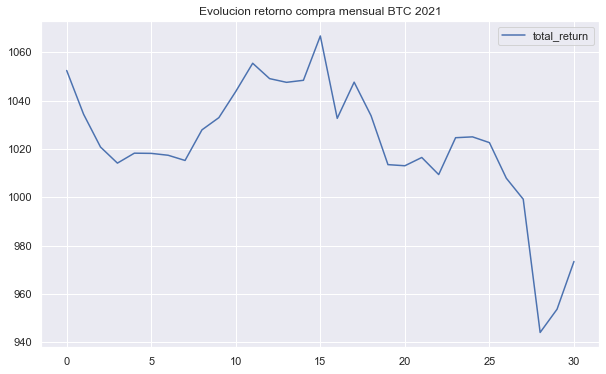

In [242]:
plt.figure(figsize=(10,6))
plt.title('Evolucion retorno compra mensual BTC 2021')
plt.plot(resultados_mes.index, resultados_mes['total_return'], label='total_return')
plt.legend()
dia_maximo = resultados_mes['total_return'].idxmax()
retorno_maximo = resultados_mes['total_return'].max()
print(f'día máximo: {dia_maximo}')
print(f'retorno máximo: {retorno_maximo}')

In [243]:
results = pd.DataFrame({'Return': [max_weekly_return, retorno_maximo ] , 'Best_day': [best_day, dia_maximo]}, index=['weekly_freq', 'Montly_freq'])
results

,Return,Best_day
weekly_freq,1035.53,6
Montly_freq,1066.71,15
